In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [104]:
##Parameter definitions (SI)
M =1783
V = 50/3.6  #m/s
k1 = k2 = 2.8 * 10**7
c1 = c2 = 5 * 10**4
a = 1.22
b = 1.5
Ic = 4000
e = 0.75
L = 0.5
A = 0.06
f = 0.35
f_e = 35 #2100/60
m_e = 20
w_e = 2*(np.pi)*f_e
w = 2*np.pi*(V/L)    
r = 0.045
Fn = m_e*(w_e**2)*r

43524.95540880406


In [105]:

def d1(t):
  if t>2:
    return 0
  return A*(1-np.cos(w*t))
def d2(t):
  if t>2:
    return 0
  return A*(1+np.cos(w*t))
def d1_dot(t):
  if t>2:
    return 0
  return A*w*np.sin(w*t)
def d2_dot(t): 
  if t>2:
    return 0
  return -A*w*np.sin(w*t)

In [106]:
def F(t, Y):
  K = np.zeros(4)
  x = Y[0]
  theta = Y[1]
  u = Y[2]
  v = Y[3]
  K[0] = u 
  K[1] = v 
  K[2] = (-(k1+k2)*x+(k1*a-k2*b)*theta-(c1+c2)*u+(c1*a-c2*b)*v+k1*d1(t)+k2*d2(t)+c1*d1_dot(t)+c2*d2_dot(t)+Fn*np.sin(w_e*t))/M     #aqui vou esperar vc conferir antes de digitar tudo kk
  K[3] = ((k1*a-k2*b)*x-(k1*a**2+k2*b**2)*theta+(c1*a-c2*b)*u-(c1*a**2+c2*b**2)*v-k1*a*d1(t)-k2*b*d2(t)-c1*a*d1_dot(t)-c2*b*d2_dot(t)-Fn*(e*np.sin(w_e*t)+f*np.cos(w_e*t)))/Ic
  return K


In [107]:
def rk4_solver(Y0, t0, tf, h):
  iterations  = int(np.floor((tf-t0)/h))
  #iterations = 100
  Y = Y0
  print("t0 ", t0)
  print("tf ", tf)
  print("iterations? ", iterations)
  for i in range(iterations):
    #print("entra?")
    t_i = t0 + h*i
    K1 = F(t_i, Y)
    K2 = F(t_i + 0.5*h, Y + 0.5*h*K1)
    K3 = F(t_i + 0.5*h, Y + 0.5*h*K2)
    K4 = F(t_i+ h, Y + h*K3)
    Y += (h/6)*(K1+2*K2+2*K3+K4)
  #print(Y0)
  return Y

In [108]:
Y0 = np.array([0, 0.09, 0, 0])
t0 = 0
tf = 4
h_s = 0.01    #small
h_m = 0.04    #medium
h_l = 0.4     #large 

In [109]:
#Plotting
n = 1000
t_sampled = np.linspace(t0, tf, n) #array of instants to evaluate Y
#print(t_sampled)
Y = np.zeros((n,4))
for i in range(n):
  Y[i] = rk4_solver(Y0, t0, t_sampled[i], h_s) 
print(Y)
#print(np.transpose(Y))

t0  0
tf  0.0
iterations?  0
y I [0.   0.09 0.   0.  ]
t0  0
tf  0.004004004004004004
iterations?  0
y I [0.   0.09 0.   0.  ]
t0  0
tf  0.008008008008008008
iterations?  0
y I [0.   0.09 0.   0.  ]
t0  0
tf  0.012012012012012012
iterations?  1
y I [  0.05373636  -0.02659488   8.16591553 -16.79713664]
t0  0
tf  0.016016016016016016
iterations?  1
y I [ 0.10783008 -0.12735406  1.65073439 -2.04114256]
t0  0
tf  0.02002002002002002
iterations?  2
y I [ 0.04442157 -0.00387915 -2.10117737  3.27553275]
t0  0
tf  0.024024024024024024
iterations?  2
y I [ 0.07883454 -0.06792586  1.51862805 -1.81808108]
t0  0
tf  0.028028028028028028
iterations?  2
y I [ 0.06134983 -0.0362836  -1.31781431  2.19907054]
t0  0
tf  0.03203203203203203
iterations?  3
y I [ 0.06956992 -0.05179464 -0.41072619  0.14666176]
t0  0
tf  0.036036036036036036
iterations?  3
y I [ 0.0648936  -0.0436535   0.0578763  -0.78059705]
t0  0
tf  0.04004004004004004
iterations?  4
y I [ 0.0661419  -0.05253218  0.4940817  -1.22562456]


(-4.0, 10.0)

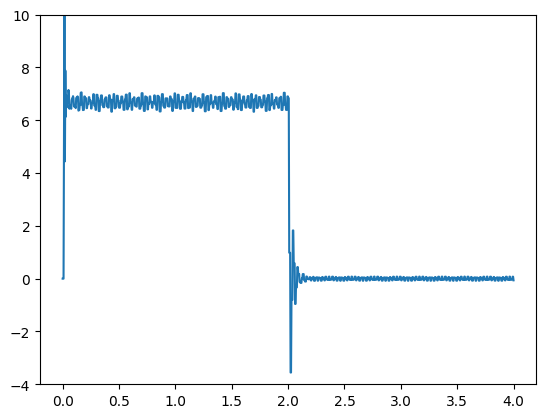

In [113]:
Z = np.transpose(Y)
plt.plot(t_sampled, 100*Z[0])
plt.ylim(-4,10)